In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_1 = 500
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差

In [3]:
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                               ,test_size=0.3
                                               ,random_state=420)

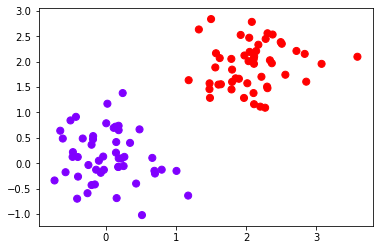

In [46]:
plt.scatter(X[:,0][450:550],X[:,1][450:550],c=y[450:550],s=50,cmap="rainbow")
plt.show()

In [16]:
np.unique(y)

array([0, 1])

In [10]:
Xtrain

array([[1.61285246, 1.86530511],
       [0.75999743, 0.85979465],
       [0.47045881, 0.20260204],
       ...,
       [0.74467798, 0.26065187],
       [1.19157239, 0.47223974],
       [1.13838587, 2.89876969]])

In [4]:
#先归一化，保证输入多项式朴素贝叶斯的特征矩阵中不带有负数
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [8]:
Xtrain_.shape

(700, 2)

In [9]:
Xtrain_

array([[0.59865607, 0.69942184],
       [0.4251378 , 0.49186641],
       [0.3662295 , 0.35621004],
       ...,
       [0.42202097, 0.36819257],
       [0.51294421, 0.41186811],
       [0.50212311, 0.9127475 ]])

In [11]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [17]:
#重要属性：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
#由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [20]:
mnb.class_log_prior_.shape
#等于标签数

(2,)

In [18]:
(Ytrain == 1).sum()/Ytrain.shape[0]

0.49857142857142855

In [19]:
(Ytrain == 0).sum()/Ytrain.shape[0]

0.5014285714285714

In [21]:
#可以使用np.exp来查看真正的概率值
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [22]:
#重要属性：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [23]:
mnb.feature_log_prob_.shape
#因为有两个特征,两个标签

(2, 2)

In [24]:
#重要属性：在fit时每个标签类别下包含的样本数。当fit接口中的sample_weight被设置时，该接口返回的值也会受到加权的影响
mnb.class_count_

array([351., 349.])

In [25]:
mnb.predict(Xtest_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
mnb.predict_proba(Xtest_)

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [27]:
mnb.score(Xtest_,Ytest)
#太低了

0.5433333333333333

In [28]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)
#偏高

0.24977828412546027

In [47]:
#模型不太理想,来试试看把Xtiain转换成分类型数据吧
#注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了
from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [48]:
Xtrain_.shape
#2个特征中,每个特征分了10个箱 所得的哑变量

(700, 20)

In [49]:
#再试试多项式贝叶斯,效果非常好
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [50]:
mnb.score(Xtest_,Ytest)

0.9966666666666667

In [51]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

0.0014593932778211862